## 3. Language Identification with Naive Bayes

In [1]:
import numpy as np

### 1. Training data

In [2]:
def get_char_counts(fname):
    fo = open(f'languageID/{fname}')
    lines = fo.readlines()
    counts = [0]*27
    for line in lines:
        for c in line:
            if c == ' ':
                counts[-1] += 1
            elif 'a' <= c <= 'z':
                counts[ord(c) - ord('a')] += 1
            else:
                continue
    return counts

In [3]:
X_train = []
y_train = []
for l in ['e', 'j', 's']:
    for i in range(20):
        x = get_char_counts(f'{l}{i}.txt')
        y = l
        X_train.append(x)
        y_train.append(y)
X_train = np.array(X_train)
y_train = np.array(y_train)

### 2. Class conditional probability (English)

In [4]:
def get_char_probs(counts, log_prob = False):
    tot = np.sum(counts)
    probs = np.divide(counts+0.5, tot + 27*0.5)
    if log_prob:
        return np.log(probs)
    return probs

In [5]:
all_eng_counts = [0]*27
for i in range(10):
    counts = get_char_counts(f'e{i}.txt')
    all_eng_counts = np.add(all_eng_counts, counts)

In [6]:
eng_probs = get_char_probs(all_eng_counts)
print(eng_probs)
eng_log_probs = get_char_probs(all_eng_counts, True)
print(eng_log_probs)

[0.06016851 0.01113497 0.02151    0.02197258 0.10536924 0.01893276
 0.01747894 0.04721626 0.05541054 0.00142078 0.00373369 0.02897737
 0.02051875 0.05792169 0.0644639  0.01675202 0.0005617  0.05382455
 0.06618206 0.08012556 0.02666446 0.00928465 0.01549645 0.00115645
 0.01384437 0.00062779 0.17924996]
[-2.81060613 -4.49766428 -3.83923757 -3.81796017 -2.25028454 -3.96686149
 -4.04675878 -3.05301703 -2.89298545 -6.55654709 -5.59035939 -3.54124022
 -3.88641613 -2.84866332 -2.74164987 -4.0892362  -7.48453386 -2.9220256
 -2.71534587 -2.5241604  -3.62442354 -4.67939254 -4.16714444 -6.76239915
 -4.27987629 -7.37330823 -1.71897403]


### 3. Class conditional probability (Japanese and Spanish)

In [7]:
all_jap_counts = [0]*27
for i in range(10):
    counts = get_char_counts(f'j{i}.txt')
    all_jap_counts = np.add(all_jap_counts, counts)

In [8]:
jap_probs = get_char_probs(all_jap_counts)
print(jap_probs)
jap_log_probs = get_char_probs(all_jap_counts, True)
print(jap_log_probs)

[1.31765610e-01 1.08669066e-02 5.48586603e-03 1.72263182e-02
 6.02047591e-02 3.87854223e-03 1.40116706e-02 3.17621161e-02
 9.70334393e-02 2.34110207e-03 5.74094133e-02 1.43261470e-03
 3.97987351e-02 5.67105769e-02 9.11632132e-02 8.73545547e-04
 1.04825466e-04 4.28037318e-02 4.21747790e-02 5.69901115e-02
 7.06174220e-02 2.44592753e-04 1.97421294e-02 3.49418219e-05
 1.41514379e-02 7.72214263e-03 1.23449457e-01]
[ -2.02673061  -4.5220332   -5.20558031  -4.06131694  -2.81000388
  -5.55229591  -4.26786468  -3.44948102  -2.33269962  -6.05713349
  -2.85754699  -6.54825405  -3.22392015  -2.86979454  -2.39510383
  -7.04295029  -9.16321382  -3.15112999  -3.16593289  -2.86487751
  -2.65047839  -8.31591596  -3.92500038 -10.26182611  -4.25793904
  -4.86366341  -2.09192346]


In [9]:
all_spa_counts = [0]*27
for i in range(10):
    counts = get_char_counts(f's{i}.txt')
    all_spa_counts = np.add(all_spa_counts, counts)
all_spa_counts = np.array(all_spa_counts)

In [10]:
spa_probs = get_char_probs(all_spa_counts)
print(spa_probs)
spa_log_probs = get_char_probs(all_spa_counts, True)
print(spa_log_probs)

[1.04560451e-01 8.23286362e-03 3.75258241e-02 3.97459221e-02
 1.13810860e-01 8.60287996e-03 7.18448398e-03 4.53270019e-03
 4.98597021e-02 6.62945947e-03 2.77512257e-04 5.29431717e-02
 2.58086399e-02 5.41765595e-02 7.24923684e-02 2.42669051e-02
 7.67783910e-03 5.92951189e-02 6.57704049e-02 3.56140730e-02
 3.37023219e-02 5.88942678e-03 9.25040856e-05 2.49761031e-03
 7.86284728e-03 2.68261848e-03 1.68264932e-01]
[-2.25798989 -4.79962138 -3.28272594 -3.22524803 -2.17321733 -4.75565825
 -4.93583158 -5.39643745 -2.99854217 -5.01623201 -8.18964546 -2.93853617
 -3.65704596 -2.91550695 -2.62427399 -3.71864179 -4.86941714 -2.82522829
 -2.72158532 -3.33501441 -3.39018855 -5.13459661 -9.28825775 -5.99242088
 -4.84560649 -5.92096192 -1.78221557]


In [11]:
theta = {'e':eng_probs, 'j':jap_probs, 's':spa_probs}
log_theta = {'e':eng_log_probs, 'j':jap_log_probs, 's':spa_log_probs}

### 4. `e10.txt` Bag of Words

In [12]:
x_test = get_char_counts('e10.txt')
print(x_test)

[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


### 5. $\hat{p}(x|y)$

In [17]:
# p(x|y)
def get_log_conditional_prob(x, lang):
    log_cond_prob = 0
    for i in range(len(x)):
        log_cond_prob += x[i]*log_theta[lang][i]
    return log_cond_prob

In [22]:
get_log_conditional_prob(x_test, 'e')

-7841.865447060635

### 6. Bayes Rule

$\hat{p}(y|x) = \hat{p}(x|y)\frac{\hat{p}(y)}{\hat{p}(x)}$

Since $\hat{p}(x)$ is constant for a given $x$, we do not consider it.

In [30]:
# p(y|x)
def get_likelihoods(x):
    probs = []
    probs.append(get_log_conditional_prob(x, 'e'))
    probs.append(get_log_conditional_prob(x, 's'))
    probs.append(get_log_conditional_prob(x, 'j'))
    print(probs)
    return probs

In [31]:
def get_pred(x):
    return ['e', 's', 'j'][np.argmax(get_likelihoods(x))]

In [32]:
 
for i in ['e', 'j', 's']:
    for j in range(10, 20):
        x = get_char_counts(f'{i}{j}.txt')        

[-4543.249534799642, -5003.949919617463, -4132.7800967775565]
j
[-4598.848848321209, -5052.089874984948, -4106.238627375199]
j
[-3822.350493773421, -4175.6086113193, -3439.0411810412716]
j
[-4826.540783942628, -5295.515536742583, -4335.666788921198]
j
[-4936.700577830607, -5343.720172523175, -4377.5610450337035]
j
[-3854.2561120251444, -4210.085106203885, -3538.4795101791997]
j
[-4438.050421461976, -4847.863189329948, -3992.246840197491]
j
[-4805.793025892924, -5255.7747994465135, -4367.791810248242]
j
[-4304.069949500221, -4705.929062937818, -3828.7972721393226]
j
[-4273.309194940599, -4581.8368792892625, -3876.7326946260414]
j


## 4. Simple Feed-Forward Network

In [ ]:
import numpy as np
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.preprocessing import OneHotEncoder

import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

In [26]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

In [48]:
def initialize_parameters(d, d1, k, init_wts):
    np.random.seed(0)
    if init_wts == 'zero':
        W1 = np.zeros((d, d1))
        W2 = np.zeros((d1, k))
    elif init_wts == 'random':
        W1 = np.random.uniform(-1, 1, (d, d1))
        W2 = np.random.uniform(-1, 1, (d1, k))
    b1 = np.zeros((1, d1))
    b2 = np.zeros((1, k))
    return W1, b1, W2, b2

In [28]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A1, A2

In [29]:
def backward_propagation(X, A1, A2, Y, W2):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * A1 * (1 - A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [30]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [46]:
def train(X, Y, d1, k, num_epochs, learning_rate, init_wts):
    d = X.shape[1]
    W1, b1, W2, b2 = initialize_parameters(d, d1, k, init_wts)
    for epoch in range(num_epochs):
        for i in range(len(X_train)):
            x = X[i:i+1]
            y_true = Y[i:i+1]
            A1, A2 = forward_propagation(x, W1, b1, W2, b2)
            cost = cross_entropy_loss(y_true, A2)
            dW1, db1, dW2, db2 = backward_propagation(x, A1, A2, y_true, W2)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        print(f"Epoch {epoch + 1}/{num_epochs}, Cost: {cost}")
    return W1, b1, W2, b2

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load and preprocess the MNIST data
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_test = test_dataset.targets.numpy()

enc = OneHotEncoder(categories='auto')
Y_train_onehot = enc.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_onehot = enc.transform(Y_test.reshape(-1, 1)).toarray()

In [ ]:
# Initialize the neural network parameters
d = X_train.shape[1]  # Input size (MNIST images are 28x28)
d1 = 128              # Number of units in the first hidden layer
k = 10                # Number of classes

In [ ]:
learning_rate = 0.1
num_epochs = 3

W1, b1, W2, b2 = train(X_train, Y_train_onehot, d1, k, num_epochs, learning_rate, 'random')

Epoch 1/3, Cost: 0.00042911754080437645
Epoch 2/3, Cost: 0.00042310261584901704
Epoch 3/3, Cost: 0.0013986781447004745


In [ ]:
correct = 0

for i in range(len(X_test)):
    x = X_test[i:i+1]
    y_true = Y_test[i]
    _, A2 = forward_propagation(x, W1, b1, W2, b2)
    predicted_class = np.argmax(A2)

    if predicted_class == y_true:
        correct += 1

accuracy = (correct / len(X_test)) * 100
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 95.70%


#### Using PyTorch

In [79]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, d, d1, k):
        nn.Module.__init__(self)
        self.fc1 = nn.Linear(d, d1)
        self.fc2 = nn.Linear(d1, k)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [80]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [82]:
# Initialize the neural network
d = 28 * 28  # Input size (MNIST images are 28x28)
d1 = 300     # Number of units in the first hidden layer
k = 10       # Number of classes
model = NeuralNetwork(d, d1, k)

In [84]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)  # Flatten the input images
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
# Test the network
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = (correct / total) * 100
print(f'Accuracy on the test set: {accuracy:.2f}%')

#### Initialize randomly

In [49]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load and preprocess the MNIST data
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_test = test_dataset.targets.numpy()

enc = OneHotEncoder(categories='auto')
Y_train_onehot = enc.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_onehot = enc.transform(Y_test.reshape(-1, 1)).toarray()

In [50]:
# Initialize the neural network parameters
d = X_train.shape[1]  # Input size (MNIST images are 28x28)
d1 = 128              # Number of units in the first hidden layer
k = 10                # Number of classes

In [51]:
learning_rate = 0.1
num_epochs = 3

W1, b1, W2, b2 = train(X_train, Y_train_onehot, d1, k, num_epochs, learning_rate, 'random')

Epoch 1/3, Cost: 0.00042911754080437645
Epoch 2/3, Cost: 0.00042310261584901704
Epoch 3/3, Cost: 0.0013986781447004745


In [52]:
correct = 0

for i in range(len(X_test)):
    x = X_test[i:i+1]
    y_true = Y_test[i]
    _, A2 = forward_propagation(x, W1, b1, W2, b2)
    predicted_class = np.argmax(A2)

    if predicted_class == y_true:
        correct += 1

accuracy = (correct / len(X_test)) * 100
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 95.70%


#### Initialize to 0

In [53]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load and preprocess the MNIST data
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28) / 255.0
Y_test = test_dataset.targets.numpy()

enc = OneHotEncoder(categories='auto')
Y_train_onehot = enc.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_onehot = enc.transform(Y_test.reshape(-1, 1)).toarray()

In [54]:
# Initialize the neural network parameters
d = X_train.shape[1]  # Input size (MNIST images are 28x28)
d1 = 128              # Number of units in the first hidden layer
k = 10                # Number of classes

In [55]:
learning_rate = 0.1
num_epochs = 3

W1, b1, W2, b2 = train(X_train, Y_train_onehot, d1, k, num_epochs, learning_rate, init_wts='zero')

Epoch 1/3, Cost: 1.6013102493001914
Epoch 2/3, Cost: 1.6065865705098037
Epoch 3/3, Cost: 1.5938681688176495


In [56]:
correct = 0

for i in range(len(X_test)):
    x = X_test[i:i+1]
    y_true = Y_test[i]
    _, A2 = forward_propagation(x, W1, b1, W2, b2)
    predicted_class = np.argmax(A2)

    if predicted_class == y_true:
        correct += 1

accuracy = (correct / len(X_test)) * 100
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 34.38%


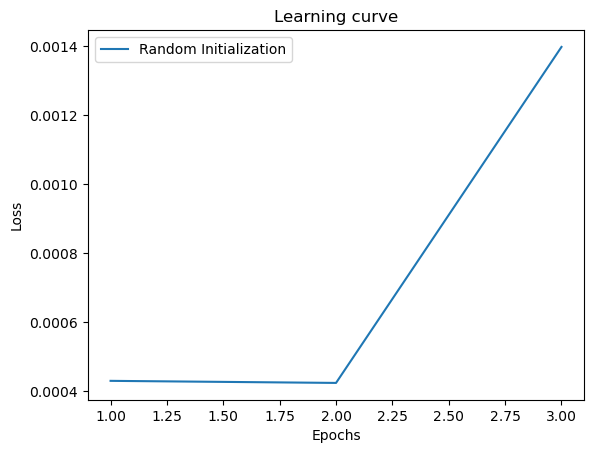

In [63]:
import matplotlib.pyplot as plt

plt.title('Learning curve')
plt.plot([1,2,3], [0.00042911754080437645, 0.00042310261584901704, 0.0013986781447004745], label='Random Initialization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

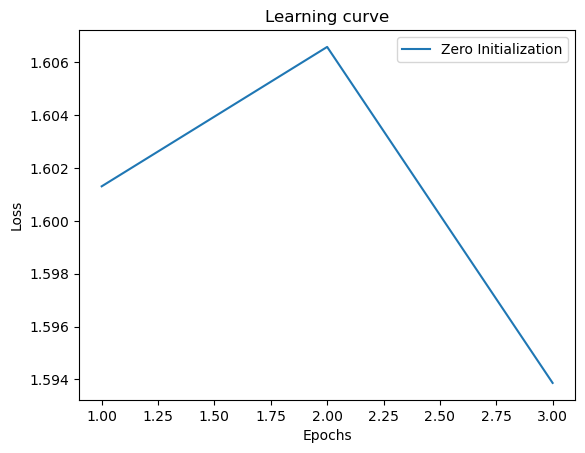

In [69]:
plt.title('Learning curve')
plt.plot([1,2,3], [1.6013102493001914, 1.6065865705098037, 1.5938681688176495], label='Zero Initialization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()